Introduction to Regression with Neural Networks in TensorFlow

THere are many definitions for a regression problem but in our case, we're going to simplify it:
predicting a numerical variable based on some other combination of variable, even shorter...predicting a number.

In [30]:
#Import TensorFlow

import tensorflow as tf

print(tf.__version__)



2.5.0


Creating data to view and fit


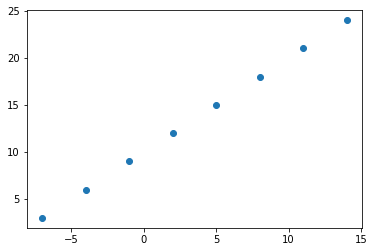

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#Create Labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize It
plt.scatter(X,y);

In [32]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Inputs and Outputs shape




In [33]:
#Create a demo tensor for ou housing price prediction prices

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [34]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [35]:
X[0].ndim

0

In [36]:
X[0], y[0]

(-7.0, 3.0)

In [37]:
#Turn our Numpy arrays into tensors

X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [38]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#Steps in modelling in TensorFlow

1. creating a model - define the inputs and output layes, as well as hidden layers of a deep learning model.

2. Compiling a model - define the loss function ( in other words, the function which tells out model how wrong it is) and the optimizer (tell our model how to improve the patterns its learning) and evalutation metrics
(what we can use to interpret the performance of out model).

3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [39]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a mode using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is short for mean abolute error which is on average how wrong our model is.output_shape#
                optimizer= tf.keras.optimizers.SGD(), #sgd is short for stochastic gradiant descent, tells how to improve)
                metrics=["mae"])
#3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 152ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748


In [40]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [41]:
#Try and make a prediciton
y_pred = model.predict([20.0])
y_pred

array([[14.9512005]], dtype=float32)

In [42]:
y_pred + 14

array([[28.9512]], dtype=float32)

##Improve our model

We can improve out model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on a more data (give the model more examples to learn from).

In [43]:
#Lets rebuild the model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 201ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594

In [44]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
#Let's see if our model's prediction has improved...

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [56]:

# 1. Rebuilding model again!!!

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1, activation=None)
])

# 2.Compile the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=.01),
              metrics=["mae"])

# 3. Fit the model

model.fit(X,y,epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 250ms/step - loss: 12.3469 - mae: 12.3469
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 11.6170 - mae: 11.6170
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 10.8837 - mae: 10.8837
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 10.1465 - mae: 10.1465
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 9.4040 - mae: 9.4040
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 8.6532 - mae: 8.6532
Epoch 

In [57]:
model.predict([17.0])

array([[27.059658]], dtype=float32)

In [51]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Evaluating a model's performance

In practice, a typical workflow you'll gogo through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation.. there are 3 words to memorize:
Visualize, Visualize, Viualize:

* The data - what data are we working with? What does it look like?

* The model itself - what does our model look like?

* The Training of the model - how does the model perform while it learns?

* The prediction of the model - How do the predioctions of a model line up against the ground truth (the original labels)?

In [58]:
#Make a bigger dataset

X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [59]:
#Make labels for the dataset

y = X + 10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

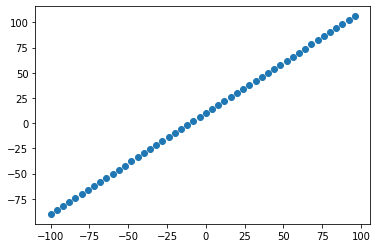

In [60]:
#Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.

* Validation set - the model gets tuned on this data, which is typicaly 10-15% of the data available

Test set - The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data availablie.


In [61]:
#Check the length of how many samples we have

len(X)

50

In [63]:
#Split the data into rain and test sets

X_train = X[:40] #First 40 are training samples (80% of data)

y_train = y[:40]

X_test = X[40:] # last 10 are testing amples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data

Now that we've got our data in training and test sets....let's visualize it again!




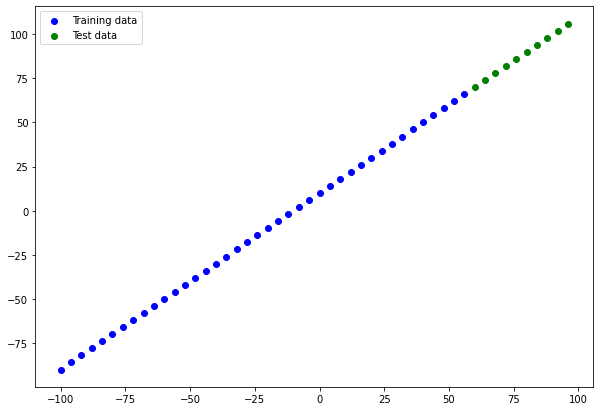

In [66]:
plt.figure(figsize=(10,7))

#plot training data in blue

plt.scatter(X_train, y_train, c = "b", label= "Training data")
#Plot Test data in Green
plt.scatter(X_test, y_test, c = "g", label = "Test data") #Be able to predict on this data
#Show a legend
plt.legend();

In [67]:
#Create model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model

#model.fit(X_train, y_train, epochs=100)

In [68]:
#Visualize the model

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [79]:
#LEt's create a model which builds automatically by defining the input_shape argument in the first layer.
tf.random.set_seed(42)

#Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=[1])
                                                   ])
#Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [80]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-Trainable params - these parameter aren't updated during training( this is typical when you bring in already learned patterns or parameters from other models during
**Transfer Learning**).


In [98]:
##Fit model
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4063 - mae: 7.4063
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 7.2984 - mae: 7.2984
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 7.3141 - mae: 7.3141
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 7.3372 - mae: 7.3372
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 7.3915 - mae: 7.3915
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 7.3172 - mae: 7.3172
Epoch 7/100
2/2 [=====

In [99]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
